In [2]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import matplotlib.tri as mtri
import math

In [8]:
plt.style.use("ggplot")

In [3]:
ekg1_n = pd.read_csv("./sensor_data_mitar/EKG_snimak1.csv", header=None).values[0]

In [6]:
print(ekg1_n.shape)
ekg1_n = ekg1_n[1000:]

(22119,)


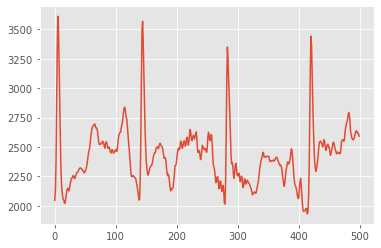

In [9]:
plt.figure()
plt.plot(ekg1_n[1000:1500])

In [10]:
import scipy.signal as sg

ekg1 = sg.decimate(ekg1_n, 2)
print(ekg1.shape)

(10560,)


In [11]:

hearthbeat_set = []

QRS_threshold = 3000#2800
NO_RESET = 15
DO_RESET = 15
DATASET_LENGTH = 185#186#744#374#
BUFFER_SIZE = 5

sampleCounter = 0
countDown = NO_RESET
countReset = DO_RESET
countBuffer = BUFFER_SIZE

state = 0
for i in range(len(ekg1)):
    sample = ekg1[i]
    if state == 0:
        hearthbeat = np.zeros(186, dtype='float')

        sampleCounter = 0
        countDown = NO_RESET
        countReset = DO_RESET
        countBuffer = BUFFER_SIZE

        hearthbeat[sampleCounter] = sample
        sampleCounter += 1

        if sample > QRS_threshold:
            state = 1


    if state == 1:
        hearthbeat[sampleCounter] = sample
        sampleCounter += 1

        countDown -= 1

        if countDown <= 0:
            state = 2


    if state == 2:
        hearthbeat[sampleCounter] = sample
        sampleCounter += 1

        countReset -= 1

        if countReset <= 0:
            state = 3

        if sample > QRS_threshold:
            state = 0


    if state == 3:
        hearthbeat[sampleCounter] = sample
        sampleCounter += 1

        if sample >= QRS_threshold:
                state = 4

        if sampleCounter > DATASET_LENGTH:
            hearthbeat -= np.partition(np.unique(hearthbeat), 2)[1]
            hearthbeat /= np.max(hearthbeat)
            hearthbeat = np.where(hearthbeat < 0, 0, hearthbeat)
            hearthbeat_set.append(hearthbeat.copy())
            state = 0


    if state == 4:
        hearthbeat[sampleCounter] = sample
        sampleCounter += 1

        countBuffer -= 1

        if sampleCounter > DATASET_LENGTH:
            #print("%f %d" % (np.partition(np.unique(hearthbeat), 2)[1], len(hearthbeat_set)))
            hearthbeat -= np.partition(np.unique(hearthbeat), 2)[1]
            hearthbeat /= np.max(hearthbeat)
            hearthbeat = np.where(hearthbeat < 0, 0, hearthbeat)
            
            hearthbeat_set.append(hearthbeat.copy())
            state = 0
            #print("It happened %d" % len(hearthbeat_set))
            
        if countBuffer <= 0:
            #print(len(hearthbeat_set))
            #print(np.partition(np.unique(hearthbeat), 2)[1])
            hearthbeat -= np.partition(np.unique(hearthbeat), 2)[1]
            hearthbeat /= np.max(hearthbeat)
            hearthbeat = np.where(hearthbeat < 0, 0, hearthbeat)
            
            hearthbeat_set.append(hearthbeat.copy())
            state = 0


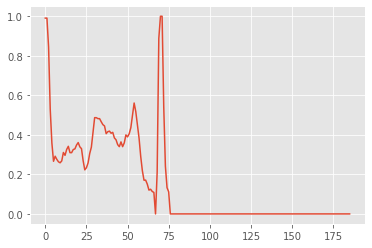

In [12]:
plt.plot(hearthbeat_set[2])

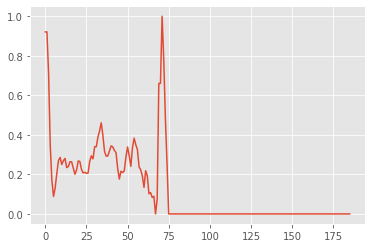

In [14]:
plt.plot(hearthbeat_set[5])

In [13]:
print(len(hearthbeat_set))

68
